# CSE5311: Numerical Methods for Data Analytics
## Homework 3
### Regression

The goal of this assignment is to gain experience work with regression models.  Recall the main purpose of regression is to fit functions to a sample of training data.  In general, our regression model will take the form: 
$$y= f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \cdots + \beta x^p$$
Starting from a set of *n* training samples $\big\{ x_i ,y_i \big\}$, for $ i=1,\ldots,n $, fitting the regression model translates to estimating the unknow coefficients $\beta$'s.

In [1]:
# Import any libraries you may need.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
import seaborn as sns

## Regression using synthetic data
Generate 1D data from a true function.  Use y=sin(x) with $x\in[0,2\pi]$, with 100 points in that range. 

In [2]:
# True function values.
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)


Add Gaussian random noise to the $y$ signal.  You should experiment with multiplying the random noise with a scalar value, like 0.1, to make sure it is not too noisy.

In [3]:
# Adding Gaussian noise to the sine function using g(x) = (1/sqrt(variance)*sqrt(2*pi))*[exp((x-mu)^2/2*variance)]
# Assuming a variance of 0.1 and a mean of 0.
mu = 0
sig = 0.1

gaussian = np.random.normal(mu,sig,100)
#print(gaussian.shape)

y_noise = y + (gaussian)
#print(y_noise)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


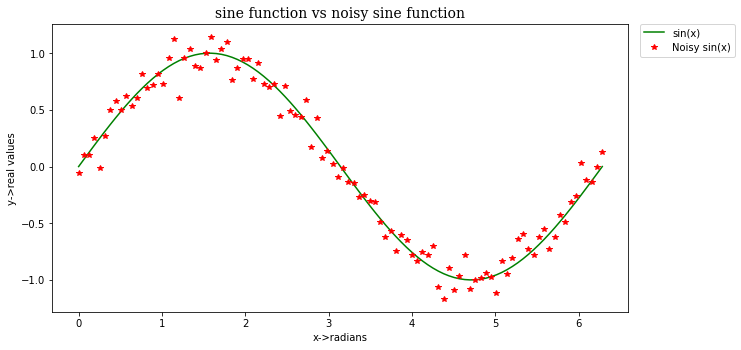

In [4]:
# Plot the true and noisy signal.
fig = plt.figure(figsize=(8,4))
left, bottom, width, height = 1, 1, 1, 1
ax = fig.add_axes((left, bottom, width, height), axisbg="#FFFFFF")

#ax.plot(x, gaussian, 'b+')
ax.plot(x, y, 'g', label="sin(x)")
ax.plot(x, y_noise, 'r*', label="Noisy sin(x)")

ax.set_xlabel("x->radians")
ax.set_ylabel("y->real values")

ax.set_title("sine function vs noisy sine function", fontsize=14, fontname='serif', color="black")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)



Fit the regression model $y=\beta_0 + \beta_1x$ to noisy data.  Visualize your results showing true signal, noisy signal, and you estimated regression model $\hat{y}$.  Finally, calculate and print the squared error between the true and estimated signal, i.e.
$$E = \sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

Sum Squared Error: 21.5923595766


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


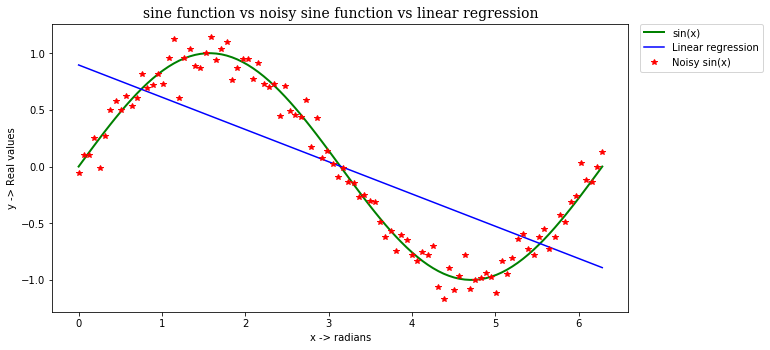

In [5]:
# Code here. 
ones = np.ones((100))
#print(ones)
designX = np.vstack((x, ones)).T
#print(designX.shape)

# Closed form solution. B_hat = (X.T*X)^-1 *X.T*y
Design_X = np.dot(designX.T,designX)
#print(Design_X)

X_TY = np.dot(designX.T,y_noise)
#print(X_TY)

Beta_hat = np.dot(np.linalg.inv(Design_X),X_TY)
#print(Beta_hat.shape)

y_est = np.dot(designX,Beta_hat)

# plot the function
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_axes((left, bottom, width, height), axisbg="#FFFFFF")

ax1.plot(x, y, 'g', linewidth=2, label="sin(x)")
ax1.plot(x, y_est, 'b-', label="Linear regression")
ax1.plot(x, y_noise, 'r*', label="Noisy sin(x)")

ax1.set_xlabel("x -> radians")
ax1.set_ylabel("y -> Real values")

ax1.set_title("sine function vs noisy sine function vs linear regression", fontsize=14, fontname='serif', color="black")

ax1.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

SSE = np.sum(np.power(y_noise - y_est,2))
print("Sum Squared Error:", SSE)

Fit the regression model $y=\beta_0 + \beta_1x + \beta_2x^2$ to noisy data.  Repeat the analysis from the previous section. 

beta_hat_quad: [ 0.00599746 -0.32218654  0.93496364]
Sum Squared Error quadratic: 21.5599537032


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


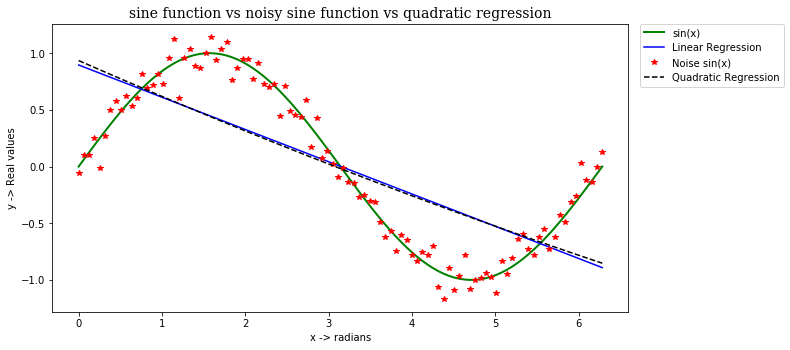

In [6]:
# Code here. 
# Create the design matrix
designX_quad = np.vstack((np.power(x,2), x, ones)).T
#print(designX_quad)

DesignX_quad = np.dot(designX_quad.T,designX_quad)
#print(DesignX_quad.shape)

xquad_Y = np.dot(designX_quad.T,y_noise)
#print(xquad_Y)

beta_hat_quad = np.dot(np.linalg.inv(DesignX_quad),xquad_Y)
print("beta_hat_quad:",beta_hat_quad)

y_est_quad = np.dot(designX_quad,beta_hat_quad)
#print(y_est_quad.shape)

SSE_quad = np.sum(np.power(y_noise - y_est_quad,2))
print("Sum Squared Error quadratic:", SSE_quad)

fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_axes((left, bottom, width, height), axisbg="#FFFFFF")

ax2.plot(x, y, 'g', linewidth=2, label="sin(x)")
ax2.plot(x, y_est, 'b-', label="Linear Regression")
ax2.plot(x, y_noise, 'r*', label="Noise sin(x)")
ax2.plot(x, y_est_quad, 'k--', label="Quadratic Regression")

ax2.set_xlabel("x -> radians")
ax2.set_ylabel("y -> Real values")

ax2.set_title("sine function vs noisy sine function vs quadratic regression", fontsize=14, fontname='serif', color="black")

ax2.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)


Do you notice a difference between the linear and quadratic errors?  Explain why or why not.  (Answer in markdown cell below.)

There is very little difference between the linear regression and quadratic regression. The beta_hat_quad for X^2 is very small (-0.00522438).

Fit the regression model $y=\beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$ to noisy data.  Repeat the analysis from the previous section. 

[ 0.09274994 -0.86815012  1.86376485 -0.18074465]
SSE for cubic regression:  1.50927640402


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


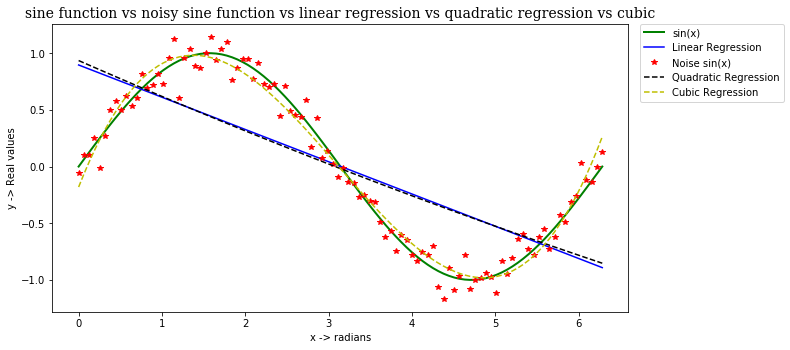

In [7]:
# Code here. 
design_cubic = np.vstack((np.power(x,3), np.power(x,2), x, ones)).T
#print(design_cubic)

design_cubicX = np.dot(design_cubic.T, design_cubic)
#print(design_cubicX.shape)

x_cubicY = np.dot(design_cubic.T,y_noise)
#print(x_cubicY.shape)

beta_hat_cubic = np.dot(np.linalg.inv(design_cubicX), x_cubicY)
print(beta_hat_cubic)

y_est_cubic = np.dot(design_cubic, beta_hat_cubic)

SSE_cubic = np.sum(np.power(y_noise-y_est_cubic,2))
print("SSE for cubic regression: ",SSE_cubic)

fig3 = plt.figure(figsize=(8,4))

ax3 = fig3.add_axes((left, bottom, width, height), axisbg="#FFFFFF")

ax3.plot(x, y, 'g', linewidth=2, label="sin(x)")
ax3.plot(x, y_est, 'b-', label="Linear Regression")
ax3.plot(x, y_noise, 'r*', label="Noise sin(x)")
ax3.plot(x, y_est_quad, 'k--', label="Quadratic Regression")
ax3.plot(x, y_est_cubic, 'y--', label="Cubic Regression")

ax3.set_xlabel("x -> radians")
ax3.set_ylabel("y -> Real values")

ax3.set_title("sine function vs noisy sine function vs linear regression vs quadratic regression vs cubic", fontsize=14, fontname='serif', color="black")

ax3.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)


Do you notice a difference between the previous models and this cubic errors?  Explain why or why not.  (Answer in markdown cell below.)

The cubic model is more accurate than the quadratic and linear regression with a SSE of 1.34018. By adding more polynomial orders, the training data is better fitted but run the risk of overfitting to the training set.


Fit your own regression model to the noisy data.  Repeat the analysis from the previous section. 

In [54]:
# Code here. Lets do a fifth order polynomial X^5
desiX = np.vstack((ones, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5))).T
#print(desiX.shape)

design_fifthX = np.dot(desiX.T, desiX)
#print(design_fifthX.shape)

x_fifthY = np.dot(desiX.T,y_noise)
#print(x_fifthY.shape)

beta_hat_fifth = np.dot(np.linalg.inv(design_fifthX), x_fifthY)
#print(beta_hat_cubic)

y_est_fifth = np.dot(desiX, beta_hat_fifth) 
print(y_est_fifth.shape)

SSE_fifth = np.sum(np.power(y_noise-y_est_fifth,2))
print("Sum Squared Error: ", SSE_fifth)

(100,)
Sum Squared Error:  0.760393575328


The mean squared error is the lowest but the problem is that the regression is done on all the training data. So the regression is overtraining on the data set.

## Regression using real data
Now you will work with csv file (USA_Housing.csv) containing some real-world housing data.  Your job is to come up with a single attribute from the data that does the best job at predicting the price.  You are free to experiment with the order of your regression model, but only a linear is required.

In [55]:
# Use pandas to read in the csv file.
!dir /B USA_Housing*

df = pd.read_csv("USA_Housing.csv")

USA_Housing.csv


Perform some simple data exploration by first looking at few rows of the data.  Hint: use head() or tail() method in pandas.

In [56]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [57]:
# Check out the number of records and data types.  Pandas has a built in method to give you a summary of your data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [58]:
# Check out a brief statistical description of our data.  Pandas has a build in method that provides 
# statistical summaries of each of the columns in your data.
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


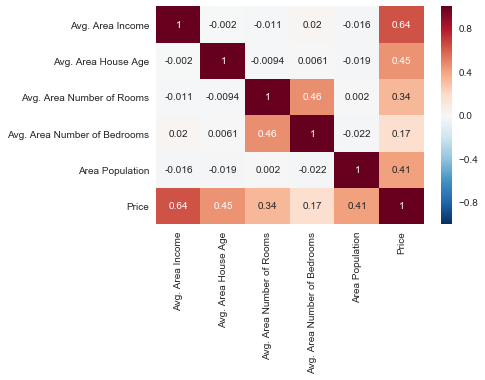

In [59]:
# Next, check out the heatmap of the correlation between the feature dimensions (columns).  Use the seaborn heatmap
# method and call it so that it displays the correlation values in each box of the heatmap.
table = df.corr()
sns.heatmap(table, annot=True)

Which column (feature) has the highest correlation with price?  (Answer in markdown cell below.)

Average Area Income has the highest correlation with Price.


Now, fit a regression model between the highest correlation dimension and the price.  Provide similar analysis, plots, etc. to what you did for the synthetic data.  You can try out other dimensions after you have completed the highest correlating one.

*Note that this is real world data, so when you plot a feature dimension versus price, it will not look like a smooth function.  More than likely, it will be a scattered ball of data.  So make sure you use '.' if you are using regualr plot or use a scatter plot to better visualize the data.*

In [62]:
# Code here
# Select the X and Y values for regression
xx = df.iloc[:,0]
yy = df.iloc[:,5]

xx = xx.values
yy = yy.values
#print(xx)

#print(xx.dtype)
#print(xx.shape)

bias = np.ones(5000)

xx_design = np.vstack((bias, xx)).T

xx_design_xTx = np.dot(xx_design.T,xx_design)
#print(xx_design_xTx)

xxT_yy = np.dot(xx_design.T, yy)
#print(xxT_yy)

beta_hat_housing = np.dot(np.linalg.inv(xx_design_xTx), xxT_yy)
#print(beta_hat_housing)

y_hat_housing_linear = np.dot(xx_design, beta_hat_housing)
#print(y_hat_housing_linear.shape)

SSE_Housing_Linear = np.sum(np.power(yy-y_hat_housing_linear,2))
print("SSE Housing Linear Regression: ", SSE_Housing_Linear)

SSE Housing Linear Regression:  3.68229703676e+14


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


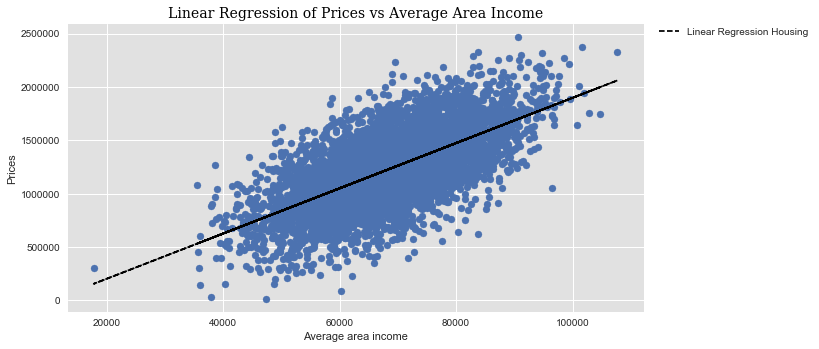

In [39]:
fig6 = plt.figure(figsize=(8,4))

ax6 = fig6.add_axes((left, bottom, width, height), axisbg="#e1e1e1")

ax6.scatter(xx, yy)
ax6.plot(xx, y_hat_housing_linear, 'k--', label="Linear Regression Housing")
ax6.set_xlabel("Average area income")
ax6.set_ylabel("Prices")

ax6.set_title("Linear Regression of Prices vs Average Area Income", fontsize=14, fontname='serif', color="black")

ax6.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
